# TUD&TK - CLC

*(Hướng dẫn giải một bài tập "Least squares")*

Khảo sát 2 đại lượng $X, Y$. Cho bảng dữ liệu như sau:

| X | Y |
|---|---|
| 1 | 2 |
| 2 | 2 |
| 3 | 5 |
| 4 | 8 |

Với mỗi mô hình được cho, xác định các tham số của mô hình và tính chuẩn vector phần dư.

In [1]:
import numpy as np

xs = [1, 2, 3, 4]
ys = [2, 2, 5, 8]
print(xs, ys)

[1, 2, 3, 4] [2, 2, 5, 8]


a) Mô hình tuyến tính $Y = \theta_1 + \theta_2X$.

In [2]:
def getAb(xs, ys):
    col1 = np.ones(len(xs))
    colx = np.array(xs)
    A = np.array([col1, colx]).T
    b = np.array(ys).reshape(len(ys), 1)
    return A, b

In [3]:
A, b = getAb(xs, ys)
A, b

(array([[1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.]]),
 array([[2],
        [2],
        [5],
        [8]]))

In [4]:
x_hat = np.linalg.pinv(A) @ b
print(x_hat)
print(np.linalg.norm(A@x_hat - b))

[[-1. ]
 [ 2.1]]
1.6431676725154984


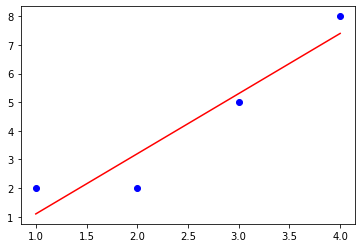

In [5]:
import matplotlib.pyplot as plt

plt.plot(xs, ys, "o", color="blue")
ts = np.linspace(min(xs), max(xs), 50)
yts = [x_hat[0] + x_hat[1]*t for t in ts]
plt.plot(ts, yts, color="red")
plt.show()

b) Mô hình $Y = \theta_1 + \theta_2X^2$.

In [6]:
def getAb(xs, ys):
    col1 = np.ones(len(xs))
    colx = np.array(xs)
    A = np.array([col1, colx**2]).T
    b = np.array(ys).reshape(len(ys), 1)
    return A, b

def model(x, theta):
    return theta[0] + theta[1]*x**2

In [7]:
A, b = getAb(xs, ys)
A, b

(array([[ 1.,  1.],
        [ 1.,  4.],
        [ 1.,  9.],
        [ 1., 16.]]),
 array([[2],
        [2],
        [5],
        [8]]))

In [8]:
x_hat = np.linalg.pinv(A) @ b
print(x_hat)
print(np.linalg.norm(A@x_hat - b))

[[1.02325581]
 [0.43023256]]
0.9338592095470353


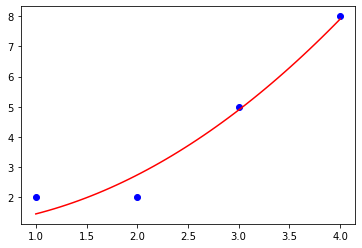

In [9]:
import matplotlib.pyplot as plt

plt.plot(xs, ys, "o", color="blue")
ts = np.linspace(min(xs), max(xs), 50)
yts = [model(t, x_hat) for t in ts]
plt.plot(ts, yts, color="red")
plt.show()

c) Mô hình đa thức $Y = \theta_1 + \theta_2 X + \theta_3 X^2$.

In [10]:
def getAb(xs, ys):
    col1 = np.ones(len(xs))
    colx = np.array(xs)
    A = np.array([col1, colx, colx**2]).T
    b = np.array(ys).reshape(len(ys), 1)
    return A, b

def model(x, theta):
    return theta[0] + theta[1]*x + theta[2]*x**2

In [11]:
A, b = getAb(xs, ys)
A, b

(array([[ 1.,  1.,  1.],
        [ 1.,  2.,  4.],
        [ 1.,  3.,  9.],
        [ 1.,  4., 16.]]),
 array([[2],
        [2],
        [5],
        [8]]))

In [12]:
x_hat = np.linalg.pinv(A) @ b
print(x_hat)
print(np.linalg.norm(A@x_hat - b))

[[ 2.75]
 [-1.65]
 [ 0.75]]
0.6708203932499364


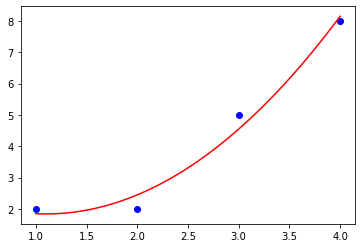

In [13]:
import matplotlib.pyplot as plt

plt.plot(xs, ys, "o", color="blue")
ts = np.linspace(min(xs), max(xs), 50)
yts = [model(t, x_hat) for t in ts]
plt.plot(ts, yts, color="red")
plt.show()

d) Mô hình tuyến tính - log: $Y = \theta_1 + \theta_2 \ln X$.

In [14]:
def getAb(xs, ys):
    col1 = np.ones(len(xs))
    colx = np.array(xs)
    A = np.array([col1, np.log(colx)]).T
    b = np.array(ys).reshape(len(ys), 1)
    return A, b

def model(x, theta):
    return theta[0] + theta[1]*np.log(x)

In [15]:
A, b = getAb(xs, ys)
A, b

(array([[1.        , 0.        ],
        [1.        , 0.69314718],
        [1.        , 1.09861229],
        [1.        , 1.38629436]]),
 array([[2],
        [2],
        [5],
        [8]]))

In [16]:
x_hat = np.linalg.pinv(A) @ b
print(x_hat)
print(np.linalg.norm(A@x_hat - b))

[[0.9795013 ]
 [4.11635406]]
2.525625919704245


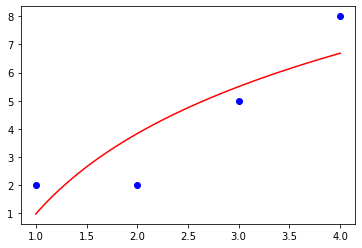

In [17]:
import matplotlib.pyplot as plt

plt.plot(xs, ys, "o", color="blue")
ts = np.linspace(min(xs), max(xs), 50)
yts = [model(t, x_hat) for t in ts]
plt.plot(ts, yts, color="red")
plt.show()

e) Mô hình log - tuyến tính: $\ln Y = \theta_1 + \theta_2 X$.

In [18]:
def getAb(xs, ys):
    col1 = np.ones(len(xs))
    colx = np.array(xs)
    A = np.array([col1, colx]).T
    b = np.log(np.array(ys).reshape(len(ys), 1))
    return A, b

def model(x, theta):
    return np.exp(theta[0] + theta[1]*x)

In [19]:
A, b = getAb(xs, ys)
A, b

(array([[1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.]]),
 array([[0.69314718],
        [0.69314718],
        [1.60943791],
        [2.07944154]]))

In [20]:
x_hat = np.linalg.pinv(A) @ b
print(x_hat)
print(np.linalg.norm(A@x_hat - b))

[[2.22044605e-16]
 [5.07517382e-01]]
0.3847814582720001


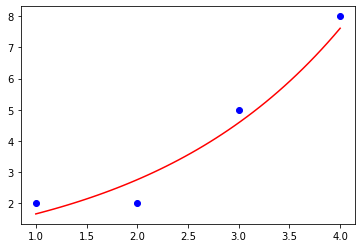

In [21]:
import matplotlib.pyplot as plt

plt.plot(xs, ys, "o", color="blue")
ts = np.linspace(min(xs), max(xs), 50)
yts = [model(t, x_hat) for t in ts]
plt.plot(ts, yts, color="red")
plt.show()

f) Mô hình log - log: $\ln Y = \theta_1 + \theta_2 \ln X$.

In [22]:
def getAb(xs, ys):
    col1 = np.ones(len(xs))
    colx = np.array(xs)
    A = np.array([col1, np.log(colx)]).T
    b = np.log(np.array(ys).reshape(len(ys), 1))
    return A, b

def model(x, theta):
    return np.exp(theta[0] + theta[1]*np.log(x))

In [23]:
A, b = getAb(xs, ys)
A, b

(array([[1.        , 0.        ],
        [1.        , 0.69314718],
        [1.        , 1.09861229],
        [1.        , 1.38629436]]),
 array([[0.69314718],
        [0.69314718],
        [1.60943791],
        [2.07944154]]))

In [24]:
x_hat = np.linalg.pinv(A) @ b
print(x_hat)
print(np.linalg.norm(A@x_hat - b))

[[0.4634213]
 [1.0136671]]
0.5673449282712968


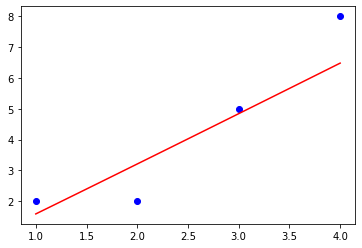

In [25]:
import matplotlib.pyplot as plt

plt.plot(xs, ys, "o", color="blue")
ts = np.linspace(min(xs), max(xs), 50)
yts = [model(t, x_hat) for t in ts]
plt.plot(ts, yts, color="red")
plt.show()